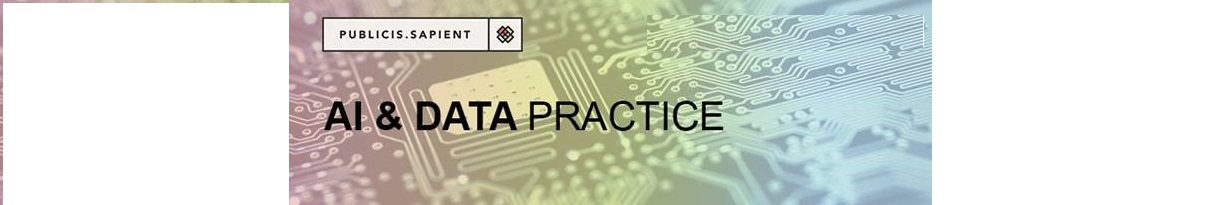

In [2]:
from IPython.display import HTML
from IPython.display import Image
import os as os
Image("C:\\Users\\ajaohri\\Desktop\\ODSP\\img\\logo.jpg")


# 3.0 Data Preparation
select and cleanse data


In [2]:
from collections import Counter
import numpy as np
import pandas as pd
import os as os
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns;sns.set()
sns.set(style="whitegrid")

for regression we take dataset from http://bit.ly/dsdata

In [4]:
path='C:\\Users\\ajaohri\\Desktop\\ODSP\\data'
os.chdir(path) 
os.listdir()

['adult.data.txt',
 'BigDiamonds.csv',
 'BigDiamonds.csv.zip',
 'BigDiamonds.zip',
 'daily-total-female-births.csv',
 'DecisionTree.png',
 'df3.csv',
 'diamonds.csv',
 'dot_data.txt',
 'fruit_classifier.txt',
 'plantTraits.csv',
 'R_ Plant Species Traits Data.html',
 'tree.dot',
 'xgb.pkl']

In [5]:

%%time
%time

df=pd.read_csv('C:\\Users\\ajaohri\\Desktop\\ODSP\\data\\BigDiamonds.csv')

Wall time: 0 ns
Wall time: 1.54 s


In [6]:
print("The name of variables in the input dataset are ",df.columns)

The name of variables in the input dataset are  Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'table', 'depth',
       'cert', 'measurements', 'price', 'x', 'y', 'z'],
      dtype='object')


In [7]:
print("The type of variables in the input dataset are ",df.dtypes)

The type of variables in the input dataset are  Unnamed: 0        int64
carat           float64
cut              object
color            object
clarity          object
table           float64
depth           float64
cert             object
measurements     object
price           float64
x               float64
y               float64
z               float64
dtype: object


In [8]:
print("The first five rows of dataset are")
df.head()

The first five rows of dataset are


,Unnamed: 0,carat,cut,color,clarity,table,depth,cert,measurements,price,x,y,z
0,1,0.25,V.Good,K,I1,59.0,63.7,GIA,3.96 x 3.95 x 2.52,NaN,3.96,3.95,2.52
1,2,0.23,Good,G,I1,61.0,58.1,GIA,4.00 x 4.05 x 2.30,NaN,4.00,4.05,2.30
2,3,0.34,Good,J,I2,58.0,58.7,GIA,4.56 x 4.53 x 2.67,NaN,4.56,4.53,2.67
3,4,0.21,V.Good,D,I1,60.0,60.6,GIA,3.80 x 3.82 x 2.31,NaN,3.80,3.82,2.31
4,5,0.31,V.Good,K,I1,59.0,62.2,EGL,4.35 x 4.26 x 2.68,NaN,4.35,4.26,2.68


In [9]:
print('The input dataset df','has',df.shape[0],"rows and",df.shape[1],'columns')

The input dataset df has 598024 rows and 13 columns


In [10]:
df = df.drop("Unnamed: 0", axis=1)

In [11]:
df = df.drop("measurements", axis=1)

 ## 3.1 Verify Data Quality
 - Completeness - how complete is the data
 - Consistance - taking note of  invalid values, missing values and outliers
 - Conformity - how is it in data type, size and format
 - Accuracy  - how accuarate to actual conditions is it
 - Integrity - is data same across all data sources
 - Timeliness - how often data is refreshed with regard to data science purposes

### 3.1.1 Select Data

We can select data using .iloc and also using conditions using query function

In [12]:
df.iloc[:3,:7]

,carat,cut,color,clarity,table,depth,cert
0,0.25,V.Good,K,I1,59.0,63.7,GIA
1,0.23,Good,G,I1,61.0,58.1,GIA
2,0.34,Good,J,I2,58.0,58.7,GIA


In [13]:
df.iloc[0:3,2:7]

,color,clarity,table,depth,cert
0,K,I1,59.0,63.7,GIA
1,G,I1,61.0,58.1,GIA
2,J,I2,58.0,58.7,GIA


In [14]:
df.query('carat>0.3 and price <306')

,carat,cut,color,clarity,table,depth,cert,price,x,y,z
494,0.31,V.Good,K,SI2,59.0,60.2,GIA,300.0,4.40,4.42,2.65
498,0.34,Good,F,I1,66.0,55.0,GIA,300.0,4.75,4.61,2.57
508,0.32,V.Good,I,I1,58.0,63.1,GIA,301.0,4.31,4.34,2.73
521,0.32,V.Good,I,I1,58.0,61.8,GIA,302.0,4.37,4.39,2.70
527,0.45,Ideal,F,I1,57.0,62.2,EGL,302.0,4.92,4.89,3.05
543,0.31,V.Good,I,I1,59.0,61.1,GIA,304.0,4.31,4.33,2.64
548,0.46,V.Good,H,I2,56.0,60.9,GIA,304.0,4.98,4.94,3.02
549,0.47,Good,I,I2,66.0,56.1,GIA,304.0,5.24,5.16,2.92
554,0.33,Good,J,SI2,64.0,58.4,GIA,305.0,4.50,4.54,2.64
558,0.31,Ideal,L,VS2,56.0,61.6,GIA,305.0,4.40,4.37,2.70


## 3.2 Clean Data

### 3.2.1  Missing Values
#### 3.2.1.1  Count of Missing Vaues

In [15]:
df.apply(lambda x: sum(x.isnull().values), axis = 0) 

carat         0
cut           0
color         0
clarity       0
table         0
depth         0
cert          0
price       713
x          1815
y          1852
z          2544
dtype: int64

### 3.2.2  Missing Value Treatment
We can do the following with missing values
##### 3.2.2.1  Drop missing values
##### 3.2.2.2 Fill missing values with test statistic
##### 3.2.2.3 impute  missing value with a machine learning algorithm


#### 3.2.2.1 dropping missing values

In [16]:

df2=df.dropna()

#note %%timeit helps to time code to determine which part of code needs to be optimized. We also introduce a loading Bar function to check progress of long running jobs

In [17]:
%timeit df2.apply(lambda x: sum(x.isnull().values), axis = 0) 


21.6 s ± 3.99 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [18]:
import sys as sys

In [19]:
#to see progress of a code operation being executed you can also use the function loading bar
def loadingBar(count,total,size):
    percent = float(count)/float(total)*100
    sys.stdout.write("\r" + str(int(count)).rjust(3,'0')+"/"+str(int(total)).rjust(3,'0') + ' [' + '='*int(percent/10)*size + ' '*(10-int(percent/10))*size + ']')

In [20]:
for x in range(0,3):
    df.apply(lambda x: sum(x.isnull().values), axis = 0) 
    loadingBar(x,2,1)

002/002 [==========]

In [21]:
del df2

#### 3.3.2.1.1 How to deal with missing values that are not NaN. Example Replace values of zero with NaN in the column named column_nam


In [22]:
# Example- Replace values of zero with NaN in the column named column_name 
#df[‘column_name’].replace(0, np.nan, inplace= True)

#### 3.2.2.2  Fill missing values with test statistic

In [23]:
#Replace missing values with meanif needed

mean_value=df['price'].mean()
df['price']=df['price'].fillna(mean_value)

In [24]:
df.apply(lambda x: sum(x.isnull().values), axis = 0) # For columns
#price no longer has missing values


carat         0
cut           0
color         0
clarity       0
table         0
depth         0
cert          0
price         0
x          1815
y          1852
z          2544
dtype: int64

In [25]:
#Replace missing values with  median if needed

median_value=df['x'].median()
df['x']=df['x'].fillna(median_value)

In [26]:
df.apply(lambda x: sum(x.isnull().values), axis = 0) # For columns


carat         0
cut           0
color         0
clarity       0
table         0
depth         0
cert          0
price         0
x             0
y          1852
z          2544
dtype: int64

#### 3.2.2.3.1  For imputing all missing values

In [27]:
#This will look for all columns where we have NaN value and replace the NaN value with specified test statistic.
#for mode we specify strategy='most_frequent'

from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(df[['y','z']])
df[['y','z']]= imp.transform(df[['y','z']])


In [28]:
#assert that there are no missing values. 
#When it encounters an assert statement, Python evaluates the accompanying expression, which is hopefully true. 
#If the expression is false, Python raises an AssertionError exception. 
assert pd.notnull(df).all().all()

In [29]:
df.apply(lambda x: sum(x.isnull().values), axis = 0) # For columns


carat      0
cut        0
color      0
clarity    0
table      0
depth      0
cert       0
price      0
x          0
y          0
z          0
dtype: int64

#### 3.2.2.3.2 In addition this has the following way to impute missing value using back fill or forward fill

In [30]:
# filling missing value with test statistic 
#for back fill 
df.fillna(method='bfill')
#for forward-fill
df.fillna(method='ffill')
#one can also specify an axis to propagate (1 is for rows and 0 is for columns)
df.fillna(method='bfill', axis=1).head()

,carat,cut,color,clarity,table,depth,cert,price,x,y,z
0,0.25,V.Good,K,I1,59,63.7,GIA,8753.02,3.96,3.95,2.52
1,0.23,Good,G,I1,61,58.1,GIA,8753.02,4,4.05,2.3
2,0.34,Good,J,I2,58,58.7,GIA,8753.02,4.56,4.53,2.67
3,0.21,V.Good,D,I1,60,60.6,GIA,8753.02,3.8,3.82,2.31
4,0.31,V.Good,K,I1,59,62.2,EGL,8753.02,4.35,4.26,2.68


#### 3.2.2.3.3 predict missing value with a machine learning algorithm 
Example- Split data into sets with missing values and without missing values, name the missing set X_text and the one without missing values X_train and take y (variable or feature where there is missing values) off the second set, naming it y_train.
Use one of classification methods to predict y_pred.Add it to X_test as your y_test column. Then combine sets together
or use fancyimpute

In [31]:
!pip install fancyimpute

You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


# RESTARTING
### Taking a fresh dataset for demonstrating missing value imputation, since previous dataset has all missing values replaced

In [32]:
df2=pd.read_csv('C:\\Users\\ajaohri\\Desktop\\ODSP\\data\\BigDiamonds.csv')


In [33]:
df2.columns
df2 = df2.drop("Unnamed: 0", axis=1)

In [34]:
df2 = df2.drop("measurements", axis=1)

In [35]:
df2.apply(lambda x: sum(x.isnull().values), axis = 0) # For columns


carat         0
cut           0
color         0
clarity       0
table         0
depth         0
cert          0
price       713
x          1815
y          1852
z          2544
dtype: int64

In [36]:
df2=df2.dropna()

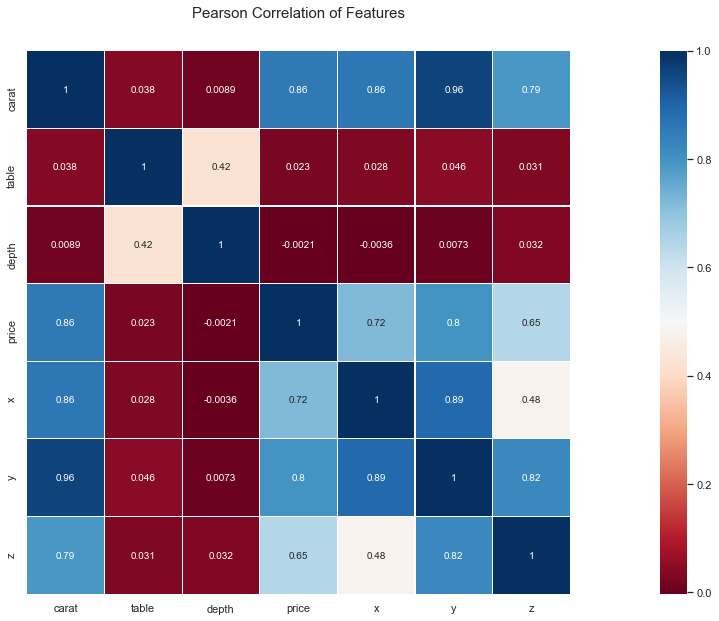

In [37]:
colormap = plt.cm.RdBu
plt.figure(figsize=(32,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df2.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
# Note that the categorical features have been neglected in the
# correlation matrix.

we can see price and x,y,carat are highly corelated but carat has no null values


In [38]:
df2.apply(lambda x: sum(x.isnull().values), axis = 0) # For columns


carat      0
cut        0
color      0
clarity    0
table      0
depth      0
cert       0
price      0
x          0
y          0
z          0
dtype: int64

In [39]:
(df2.price).corr(df2.carat)

0.8563398895939525

In [40]:
%whos DataFrame

Variable   Type         Data/Info
---------------------------------
df         DataFrame            carat     cut col<...>598024 rows x 11 columns]
df2        DataFrame            carat     cut col<...>593784 rows x 11 columns]


In [41]:
from fancyimpute import KNN

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### 3.2.3 Outlier TREATMENT

In statistics, an outlier is an observation point that is distant from other observations.

In [42]:
df=df2.copy()
del df2
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 593784 entries, 493 to 598023
Data columns (total 11 columns):
carat      593784 non-null float64
cut        593784 non-null object
color      593784 non-null object
clarity    593784 non-null object
table      593784 non-null float64
depth      593784 non-null float64
cert       593784 non-null object
price      593784 non-null float64
x          593784 non-null float64
y          593784 non-null float64
z          593784 non-null float64
dtypes: float64(7), object(4)
memory usage: 54.4+ MB


In [43]:
%whos DataFrame

Variable   Type         Data/Info
---------------------------------
df         DataFrame            carat     cut col<...>593784 rows x 11 columns]


## Looking at variables  as continuous (numeric) , categorical (discrete) and string variables
- #### Note some numeric variables can be categoric. (eg 3,4,8 cylinder cars)
- #### We use values_count.unique to find number of unique values_count for categoric and describe for numeric variables as above in continuous and categorical variales
- #### Categorical values can be made discrete using get_dummy method where each level of categorical variable can be made 1/0 binary variable
- #### Some categoric data can be string
###  You can also modify the lists of variables below manually

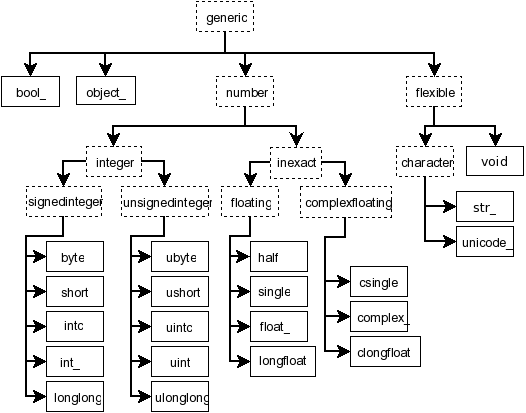

In [44]:
#https://docs.scipy.org/doc/numpy/reference/arrays.scalars.html
Image("C:\\Users\\ajaohri\\Desktop\\ODSP\\img\\dtype-hierarchy.png") 

In [45]:
df=pd.get_dummies(df, drop_first=True,sparse=True) #Sparse = True takes care of memory error

In [46]:
df.head()

,carat,table,depth,price,x,y,z,cut_Ideal,cut_V.Good,color_E,...,clarity_VVS1,clarity_VVS2,cert_EGL,cert_EGL ISRAEL,cert_EGL Intl.,cert_EGL USA,cert_GIA,cert_HRD,cert_IGI,cert_OTHER
493,0.24,61.0,58.9,300.0,4.09,4.10,2.41,0,1,0,...,0,0,0,0,0,0,1,0,0,0
494,0.31,59.0,60.2,300.0,4.40,4.42,2.65,0,1,0,...,0,0,0,0,0,0,1,0,0,0
495,0.26,56.5,64.1,300.0,4.01,4.05,2.58,0,0,0,...,0,0,0,0,0,0,0,0,1,0
496,0.24,55.0,61.3,300.0,4.01,4.03,2.47,1,0,0,...,0,0,0,0,0,0,1,0,0,0
497,0.30,57.0,62.2,300.0,4.21,4.24,2.63,0,0,0,...,0,0,0,0,0,0,1,0,0,0


## 3.5 Manual Cleaning, Construct and Preprocessing Data   

### Using Re to clean data below
Here re.sub replaces the $ and , patterns with nothing ("") from each value of the list  .
In python str converts an object to string 
. In the next step, int converts the object to numeric values (integer)

In [47]:
#MATCHING
import re 
names=["Ajay","V ijay","Ra jay ", " Jayesh"]

for name in names:
    print (re.search(r'(jay)',name))
for name in names:
    print (bool(re.search(r'(jay)',name)))

<_sre.SRE_Match object; span=(1, 4), match='jay'>
<_sre.SRE_Match object; span=(3, 6), match='jay'>
<_sre.SRE_Match object; span=(3, 6), match='jay'>
None
True
True
True
False


In [48]:
numlist=["$10000","$20,000","30,000",40000,"50000   "]
for i,value in enumerate(numlist):
    numlist[i]=re.sub(r"([$,])","",str(value))
    numlist[i]=int(numlist[i])

In [49]:
numlist

[10000, 20000, 30000, 40000, 50000]

##  3.6  Construct Data
Example of creating features based on conditions

In [50]:
df['size'] = ['Big' if x >= 4 else 'Small' for x in df['carat']]

In [51]:
pd.value_counts(df['size'])

Small    587082
Big        6702
Name: size, dtype: int64

In [52]:
df.loc[df.price <= 400, 'cost'] = 'Cheap' 
df.loc[df.price > 400, 'cost'] = 'Expensive' 

In [53]:
pd.value_counts(df['cost'])

Expensive    591223
Cheap          2561
Name: cost, dtype: int64

In [54]:
#Using if else

In [55]:
if len('ajayohri')>5:
       size2='Big'
else:
       size2='Small'
size2

'Big'

In [56]:
#using for loops

for a in range(0,10):
    print(a)

0
1
2
3
4
5
6
7
8
9


In [57]:
##using functions 
def funx(x):
    y=x*x+31*x+21
    return(y)
    
funx(10)

431

### 3.7 Integrate Data
Merged Data

### 3.8 Format Data
Reformatted data

In [58]:
df.columns

Index(['carat', 'table', 'depth', 'price', 'x', 'y', 'z', 'cut_Ideal',
       'cut_V.Good', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I',
       'color_J', 'color_K', 'color_L', 'clarity_I2', 'clarity_IF',
       'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2',
       'clarity_VVS1', 'clarity_VVS2', 'cert_EGL', 'cert_EGL ISRAEL',
       'cert_EGL Intl.', 'cert_EGL USA', 'cert_GIA', 'cert_HRD', 'cert_IGI',
       'cert_OTHER', 'size', 'cost'],
      dtype='object')

In [59]:
a=list(df.columns)
a

['carat',
 'table',
 'depth',
 'price',
 'x',
 'y',
 'z',
 'cut_Ideal',
 'cut_V.Good',
 'color_E',
 'color_F',
 'color_G',
 'color_H',
 'color_I',
 'color_J',
 'color_K',
 'color_L',
 'clarity_I2',
 'clarity_IF',
 'clarity_SI1',
 'clarity_SI2',
 'clarity_VS1',
 'clarity_VS2',
 'clarity_VVS1',
 'clarity_VVS2',
 'cert_EGL',
 'cert_EGL ISRAEL',
 'cert_EGL Intl.',
 'cert_EGL USA',
 'cert_GIA',
 'cert_HRD',
 'cert_IGI',
 'cert_OTHER',
 'size',
 'cost']

In [60]:
##### list to tuple
x=tuple(a,)
x

('carat',
 'table',
 'depth',
 'price',
 'x',
 'y',
 'z',
 'cut_Ideal',
 'cut_V.Good',
 'color_E',
 'color_F',
 'color_G',
 'color_H',
 'color_I',
 'color_J',
 'color_K',
 'color_L',
 'clarity_I2',
 'clarity_IF',
 'clarity_SI1',
 'clarity_SI2',
 'clarity_VS1',
 'clarity_VS2',
 'clarity_VVS1',
 'clarity_VVS2',
 'cert_EGL',
 'cert_EGL ISRAEL',
 'cert_EGL Intl.',
 'cert_EGL USA',
 'cert_GIA',
 'cert_HRD',
 'cert_IGI',
 'cert_OTHER',
 'size',
 'cost')

In [61]:
x=23.5
##### to int
b=int(x)
b

23

In [62]:
###### to string
c=str(b)
c

'23'

In [63]:
#### convert dataframe to numpy array
df.values

array([[0.24, 61.0, 58.9, ..., 0, 'Small', 'Cheap'],
       [0.31, 59.0, 60.2, ..., 0, 'Small', 'Cheap'],
       [0.26, 56.5, 64.1, ..., 0, 'Small', 'Cheap'],
       ...,
       [3.43, 54.0, 62.7, ..., 0, 'Small', 'Expensive'],
       [3.01, 58.0, 62.9, ..., 0, 'Small', 'Expensive'],
       [4.13, 56.0, 62.5, ..., 0, 'Big', 'Expensive']], dtype=object)

In [64]:
from datetime import datetime

datetime_object = datetime.strptime('Jun 1 2005  1:33PM', '%b %d %Y %I:%M%p')
datetime_object

datetime.datetime(2005, 6, 1, 13, 33)

### 3.9 Scaling the data
Feature scaling through standardization (or Z-score normalization) can be an important preprocessing step for many machine learning algorithms. Standardization involves rescaling the features such that they have the properties of a standard normal distribution with a mean of zero and a standard deviation of one.

While many algorithms (such as SVM, K-nearest neighbors, and logistic regression) require features to be normalized, intuitively we can think of Principle Component Analysis (PCA) as being a prime example of when normalization is important. In PCA we are interested in the components that maximize the variance. If one component (e.g. human height) varies less than another (e.g. weight) because of their respective scales (meters vs. kilos), PCA might determine that the direction of maximal variance more closely corresponds with the ‘weight’ axis, if those features are not scaled. As a change in height of one meter can be considered much more important than the change in weight of one kilogram, this is clearly incorrect.

#### 3.9.1 Log transform
- normalization by log transformation


In [65]:
%whos DataFrame

Variable   Type         Data/Info
---------------------------------
df         DataFrame            carat  table  dep<...>593784 rows x 35 columns]


In [66]:
df.apply(lambda x: sum(x.isnull().values), axis = 0)

carat              0
table              0
depth              0
price              0
x                  0
y                  0
z                  0
cut_Ideal          0
cut_V.Good         0
color_E            0
color_F            0
color_G            0
color_H            0
color_I            0
color_J            0
color_K            0
color_L            0
clarity_I2         0
clarity_IF         0
clarity_SI1        0
clarity_SI2        0
clarity_VS1        0
clarity_VS2        0
clarity_VVS1       0
clarity_VVS2       0
cert_EGL           0
cert_EGL ISRAEL    0
cert_EGL Intl.     0
cert_EGL USA       0
cert_GIA           0
cert_HRD           0
cert_IGI           0
cert_OTHER         0
size               0
cost               0
dtype: int64

In [67]:
df=df.dropna()

In [68]:
df.describe()

,carat,table,depth,price,x,y,z,cut_Ideal,cut_V.Good,color_E,...,clarity_VVS1,clarity_VVS2,cert_EGL,cert_EGL ISRAEL,cert_EGL Intl.,cert_EGL USA,cert_GIA,cert_HRD,cert_IGI,cert_OTHER
count,593784.000000,593784.000000,593784.000000,593784.000000,593784.000000,593784.000000,593784.000000,593784.000000,593784.000000,593784.000000,...,593784.000000,593784.000000,593784.000000,593784.000000,593784.000000,593784.000000,593784.000000,593784.000000,593784.000000,593784.000000
mean,1.072593,57.658755,61.091980,8755.808723,5.991952,6.200535,4.036075,0.618114,0.282273,0.156385,...,0.091420,0.109471,0.056792,0.019005,0.019265,0.026978,0.774753,0.016572,0.072988,0.008673
std,0.813113,4.827985,7.487465,13022.108651,1.530444,1.485081,1.240932,0.485849,0.450106,0.363220,...,0.288206,0.312229,0.231444,0.136543,0.137454,0.162019,0.417745,0.127660,0.260117,0.092725
min,0.200000,0.000000,0.000000,300.000000,0.150000,1.000000,0.040000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,56.000000,61.000000,1218.000000,4.740000,4.970000,3.120000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.900000,58.000000,62.000000,3503.000000,5.780000,6.050000,3.860000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.500000,59.000000,62.700000,11186.000000,6.970000,7.230000,4.610000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,9.250000,75.900000,81.300000,99990.000000,13.890000,13.890000,13.180000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [69]:
df.dtypes

carat              float64
table              float64
depth              float64
price              float64
x                  float64
y                  float64
z                  float64
cut_Ideal            uint8
cut_V.Good           uint8
color_E              uint8
color_F              uint8
color_G              uint8
color_H              uint8
color_I              uint8
color_J              uint8
color_K              uint8
color_L              uint8
clarity_I2           uint8
clarity_IF           uint8
clarity_SI1          uint8
clarity_SI2          uint8
clarity_VS1          uint8
clarity_VS2          uint8
clarity_VVS1         uint8
clarity_VVS2         uint8
cert_EGL             uint8
cert_EGL ISRAEL      uint8
cert_EGL Intl.       uint8
cert_EGL USA         uint8
cert_GIA             uint8
cert_HRD             uint8
cert_IGI             uint8
cert_OTHER           uint8
size                object
cost                object
dtype: object

In [70]:
del df['size']
del df['cost']

In [71]:
df.values

array([[ 0.24, 61.  , 58.9 , ...,  0.  ,  0.  ,  0.  ],
       [ 0.31, 59.  , 60.2 , ...,  0.  ,  0.  ,  0.  ],
       [ 0.26, 56.5 , 64.1 , ...,  0.  ,  1.  ,  0.  ],
       ...,
       [ 3.43, 54.  , 62.7 , ...,  0.  ,  0.  ,  0.  ],
       [ 3.01, 58.  , 62.9 , ...,  0.  ,  0.  ,  0.  ],
       [ 4.13, 56.  , 62.5 , ...,  0.  ,  1.  ,  0.  ]])

In [72]:
np.log(df.iloc[:, :]).head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


,carat,table,depth,price,x,y,z,cut_Ideal,cut_V.Good,color_E,...,clarity_VVS1,clarity_VVS2,cert_EGL,cert_EGL ISRAEL,cert_EGL Intl.,cert_EGL USA,cert_GIA,cert_HRD,cert_IGI,cert_OTHER
493,-1.427116,4.110874,4.075841,5.703782,1.408545,1.410987,0.879627,-inf,0.000000,-inf,...,-inf,-inf,-inf,-inf,-inf,-inf,0.000000,-inf,-inf,-inf
494,-1.171183,4.077537,4.097672,5.703782,1.481605,1.486140,0.974560,-inf,0.000000,-inf,...,-inf,-inf,-inf,-inf,-inf,-inf,0.000000,-inf,-inf,-inf
495,-1.347074,4.034241,4.160444,5.703782,1.388791,1.398717,0.947789,-inf,-inf,-inf,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,0.000000,-inf
496,-1.427116,4.007333,4.115780,5.703782,1.388791,1.393766,0.904218,0.000000,-inf,-inf,...,-inf,-inf,-inf,-inf,-inf,-inf,0.000000,-inf,-inf,-inf
497,-1.203973,4.043051,4.130355,5.703782,1.437463,1.444563,0.966984,-inf,-inf,-inf,...,-inf,-inf,-inf,-inf,-inf,-inf,0.000000,-inf,-inf,-inf


In [73]:
df3=np.log(df.iloc[:, :])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [74]:
df3.price.describe()

count    593784.000000
mean          8.247173
std           1.301478
min           5.703782
25%           7.104965
50%           8.161375
75%           9.322418
max          11.512825
Name: price, dtype: float64

In [75]:
df.price.describe()

count    593784.000000
mean       8755.808723
std       13022.108651
min         300.000000
25%        1218.000000
50%        3503.000000
75%       11186.000000
max       99990.000000
Name: price, dtype: float64

#### 3.9.2 Z Score transform
- normalization by z score

In [76]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
#print(z)
threshold = 3
#print(np.where(z > 3))
#
print(z[:][1])


[0.93786946 0.27780666 0.11912982 0.64934306 1.04019045 1.19894849
 1.11696384 1.27223432 1.59457635 0.43055204 0.43031293 0.4374131
 0.41140068 0.36521371 0.29816194 4.70536418 0.1283344  0.06198952
 0.23420265 0.49246551 2.17430001 0.44218528 0.47790683 0.31720513
 0.35061059 0.24537969 0.13918845 0.14015347 0.16651068 0.53919734
 0.12981114 0.28059665 0.09353646]


In [77]:
np.where(z > 3)

(array([     1,      2,      2, ..., 593783, 593783, 593783], dtype=int64),
 array([15, 14, 31, ...,  3, 18, 31], dtype=int64))

In [78]:
z[2][1]

0.24000812956939752

In [79]:
z[2][2]

0.4017411743648499

In [80]:
df2_o =df[(z < 3).all(axis=1)]

In [81]:
df.iloc[2,1]

56.5

In [82]:
df2_o.iloc[2,1]

57.0

In [83]:
df2_o.head()

,carat,table,depth,price,x,y,z,cut_Ideal,cut_V.Good,color_E,...,clarity_VVS1,clarity_VVS2,cert_EGL,cert_EGL ISRAEL,cert_EGL Intl.,cert_EGL USA,cert_GIA,cert_HRD,cert_IGI,cert_OTHER
493,0.24,61.0,58.9,300.0,4.09,4.10,2.41,0,1,0,...,0,0,0,0,0,0,1,0,0,0
496,0.24,55.0,61.3,300.0,4.01,4.03,2.47,1,0,0,...,0,0,0,0,0,0,1,0,0,0
497,0.30,57.0,62.2,300.0,4.21,4.24,2.63,0,0,0,...,0,0,0,0,0,0,1,0,0,0
498,0.34,66.0,55.0,300.0,4.75,4.61,2.57,0,0,0,...,0,0,0,0,0,0,1,0,0,0
499,0.20,62.0,59.1,301.0,3.79,3.82,2.25,0,1,0,...,0,1,0,0,0,0,1,0,0,0


In [84]:
df2_o.price.describe()

count    317674.000000
mean       6763.524214
std        8456.055785
min         300.000000
25%        1081.000000
50%        2919.000000
75%        9028.000000
max       47820.000000
Name: price, dtype: float64

In [85]:
df.price.describe()

count    593784.000000
mean       8755.808723
std       13022.108651
min         300.000000
25%        1218.000000
50%        3503.000000
75%       11186.000000
max       99990.000000
Name: price, dtype: float64

In [86]:
df3.price.describe()

count    593784.000000
mean          8.247173
std           1.301478
min           5.703782
25%           7.104965
50%           8.161375
75%           9.322418
max          11.512825
Name: price, dtype: float64

In [87]:
%whos DataFrame

Variable   Type         Data/Info
---------------------------------
df         DataFrame            carat  table  dep<...>593784 rows x 33 columns]
df2_o      DataFrame            carat  table  dep<...>317674 rows x 33 columns]
df3        DataFrame               carat     tabl<...>593784 rows x 33 columns]


#### 3.9.3Scaling


In [88]:
features=list(df.columns)
features

['carat',
 'table',
 'depth',
 'price',
 'x',
 'y',
 'z',
 'cut_Ideal',
 'cut_V.Good',
 'color_E',
 'color_F',
 'color_G',
 'color_H',
 'color_I',
 'color_J',
 'color_K',
 'color_L',
 'clarity_I2',
 'clarity_IF',
 'clarity_SI1',
 'clarity_SI2',
 'clarity_VS1',
 'clarity_VS2',
 'clarity_VVS1',
 'clarity_VVS2',
 'cert_EGL',
 'cert_EGL ISRAEL',
 'cert_EGL Intl.',
 'cert_EGL USA',
 'cert_GIA',
 'cert_HRD',
 'cert_IGI',
 'cert_OTHER']

In [89]:
y='price'

In [90]:
features.remove(y)

In [91]:
features

['carat',
 'table',
 'depth',
 'x',
 'y',
 'z',
 'cut_Ideal',
 'cut_V.Good',
 'color_E',
 'color_F',
 'color_G',
 'color_H',
 'color_I',
 'color_J',
 'color_K',
 'color_L',
 'clarity_I2',
 'clarity_IF',
 'clarity_SI1',
 'clarity_SI2',
 'clarity_VS1',
 'clarity_VS2',
 'clarity_VVS1',
 'clarity_VVS2',
 'cert_EGL',
 'cert_EGL ISRAEL',
 'cert_EGL Intl.',
 'cert_EGL USA',
 'cert_GIA',
 'cert_HRD',
 'cert_IGI',
 'cert_OTHER']

In [92]:
from sklearn.preprocessing import StandardScaler
features 
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['price']].values
# Standardizing the features

In [93]:
x

array([[ 0.24, 61.  , 58.9 , ...,  0.  ,  0.  ,  0.  ],
       [ 0.31, 59.  , 60.2 , ...,  0.  ,  0.  ,  0.  ],
       [ 0.26, 56.5 , 64.1 , ...,  0.  ,  1.  ,  0.  ],
       ...,
       [ 3.43, 54.  , 62.7 , ...,  0.  ,  0.  ,  0.  ],
       [ 3.01, 58.  , 62.9 , ...,  0.  ,  0.  ,  0.  ],
       [ 4.13, 56.  , 62.5 , ...,  0.  ,  1.  ,  0.  ]])

In [94]:
y

array([[  300.],
       [  300.],
       [  300.],
       ...,
       [99960.],
       [99966.],
       [99990.]])

In [95]:
x = StandardScaler().fit_transform(x)

# The curse of dimensionality

For an estimator to be effective, you need the distance between neighboring points to be less than some value , which depends on the problem. In one dimension, this requires on average  points. In the context of the above -NN example, if the data is described by just one feature with values ranging from 0 to 1 and with  training observations, then new data will be no further away than . Therefore, the nearest neighbor decision rule will be efficient as soon as  is small compared to the scale of between-class feature variations.

If the number of features is , you now require  points. Let’s say that we require 10 points in one dimension: now  points are required in  dimensions to pave the  space. As  becomes large, the number of training points required for a good estimator grows exponentially.

For example, if each point is just a single number (8 bytes), then an effective -NN estimator in a paltry  dimensions would require more training data than the current estimated size of the entire internet (±1000 Exabytes or so).

This is called the curse of dimensionality and is a core problem that machine learning addresses

# 3.4 DIMENSIONALITY REDUCTION -SVD
Dimensionality reduction using truncated SVD (aka LSA). The Singular-Value Decomposition (SVD), is a matrix decomposition method for reducing a matrix to its constituent parts in order to make certain subsequent matrix calculations simpler.

This transformer performs linear dimensionality reduction by means of truncated singular value decomposition (SVD). Contrary to PCA, this estimator does not center the data before computing the singular value decomposition. This means it can work with scipy.sparse matrices efficiently.
TruncatedSVD is very similar to PCA, but differs in that it works on sample matrices  directly instead of their covariance matrices. When the columnwise (per-feature) means of  are subtracted from the feature values, truncated SVD on the resulting matrix is equivalent to PCA

In [96]:
mean_vec = np.mean(x, axis=0)
cov_mat = (x - mean_vec).T.dot((x - mean_vec)) / (x.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00000168  0.03763093  0.00888339 ...  0.09741967 -0.06661324
   0.01469094]
 [ 0.03763093  1.00000168  0.42391511 ...  0.00468438 -0.05211658
  -0.05100774]
 [ 0.00888339  0.42391511  1.00000168 ... -0.06142147 -0.23775005
  -0.02145375]
 ...
 [ 0.09741967  0.00468438 -0.06142147 ...  1.00000168 -0.03642463
  -0.01214209]
 [-0.06661324 -0.05211658 -0.23775005 ... -0.03642463  1.00000168
  -0.02624606]
 [ 0.01469094 -0.05100774 -0.02145375 ... -0.01214209 -0.02624606
   1.00000168]]


In [97]:
print('NumPy covariance matrix: \n%s' %np.cov(x.T))


NumPy covariance matrix: 
[[ 1.00000168  0.03763093  0.00888339 ...  0.09741967 -0.06661324
   0.01469094]
 [ 0.03763093  1.00000168  0.42391511 ...  0.00468438 -0.05211658
  -0.05100774]
 [ 0.00888339  0.42391511  1.00000168 ... -0.06142147 -0.23775005
  -0.02145375]
 ...
 [ 0.09741967  0.00468438 -0.06142147 ...  1.00000168 -0.03642463
  -0.01214209]
 [-0.06661324 -0.05211658 -0.23775005 ... -0.03642463  1.00000168
  -0.02624606]
 [ 0.01469094 -0.05100774 -0.02145375 ... -0.01214209 -0.02624606
   1.00000168]]


 np.linalg.eig Performs eigendecomposition on covariance matrix. Compute the eigenvalues and right eigenvectors of a square array.Eigendecomposition of a matrix is a type of decomposition that involves decomposing a square matrix into a set of eigenvectors and eigenvalues.
 
 A vector is an eigenvector of a matrix if it satisfies the following equation. Av = lambdav
 This is called the eigenvalue equation, where A is the parent square matrix that we are decomposing, v is the eigenvector of the matrix, and lambda is the lowercase Greek letter and represents the eigenvalue scalar

In [98]:
cov_mat = np.cov(x.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.49594687 -0.07428154 -0.84436156 ...  0.01791239 -0.01381392
   0.00218159]
 [ 0.02609238 -0.05855287 -0.00243252 ... -0.01751444 -0.02318106
   0.03372322]
 [ 0.004286   -0.17737657  0.00349045 ... -0.03521016  0.06373906
   0.00922714]
 ...
 [ 0.07384465  0.09726859  0.00886218 ...  0.12579306  0.1264928
  -0.04061732]
 [-0.01875632  0.35905991  0.01400967 ... -0.05395471 -0.23056342
   0.05270515]
 [ 0.01741854  0.07429253  0.00167592 ...  0.00603439  0.42784516
   0.14163475]]

Eigenvalues 
[3.71005876e+00 2.06494803e+00 5.34302879e-02 2.12736082e-03
 2.78863386e-02 1.27753506e-02 1.38223659e-01 1.96238171e-01
 1.73669752e+00 4.45724628e-01 5.26328728e-01 1.45638644e+00
 7.80744047e-01 1.27546499e+00 9.11335904e-01 9.43149695e-01
 1.23105043e+00 1.22492274e+00 1.18624298e+00 1.17781282e+00
 1.17218726e+00 1.15357628e+00 1.13155446e+00 1.11122903e+00
 1.10091022e+00 1.09189502e+00 1.06273874e+00 9.90772661e-01
 1.00335153e+00 1.03400375e+00 1.02750003e+00 1.018786

In [99]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
3.7100587623404744
2.064948025245352
1.7366975223915897
1.4563864445881027
1.2754649873616715
1.231050429453487
1.2249227360061987
1.1862429848183458
1.177812821057939
1.172187257324034
1.1535762841809039
1.1315544649077582
1.1112290267443912
1.1009102156502755
1.0918950166469157
1.0627387414587983
1.0340037490735507
1.0275000286844758
1.0187860269879072
1.0033515347546629
0.9907726609695973
0.9431496952483862
0.9113359044385985
0.7807440474847577
0.5263287281589113
0.4457246275893628
0.19623817075874436
0.13822365942241294
0.05343028791553816
0.02788633864013109
0.012775350621409862
0.0021273608170702513


In [100]:

from numpy import array
from numpy.linalg import pinv
A=df.values
print(A)
# calculate pseudoinverse
B = pinv(A)
print(B)

[[ 0.24 61.   58.9  ...  0.    0.    0.  ]
 [ 0.31 59.   60.2  ...  0.    0.    0.  ]
 [ 0.26 56.5  64.1  ...  0.    1.    0.  ]
 ...
 [ 3.43 54.   62.7  ...  0.    0.    0.  ]
 [ 3.01 58.   62.9  ...  0.    0.    0.  ]
 [ 4.13 56.   62.5  ...  0.    1.    0.  ]]
[[ 6.54314239e-06 -5.60616721e-06  1.64758479e-08 ... -3.81186693e-05
  -4.85810528e-05 -1.11779495e-05]
 [ 3.98363025e-07  1.85180213e-07 -2.61060684e-07 ... -1.40847401e-07
  -7.60110834e-09 -9.44245997e-08]
 [-1.31439035e-07 -5.86027725e-08  4.33195520e-07 ...  8.51062094e-08
   2.59013380e-08  3.53057883e-07]
 ...
 [ 7.64028469e-06  1.65358816e-06  1.37797625e-05 ...  2.50235656e-06
  -9.51493303e-06  1.81290310e-06]
 [ 5.14131599e-06  7.33461366e-07  3.69440781e-05 ...  7.12656537e-06
  -5.31238060e-06  3.39270912e-05]
 [ 6.58034225e-06  9.06360826e-06  1.34642691e-05 ...  1.20403646e-05
   2.91092766e-06  1.51307984e-05]]


In [101]:
# Pseudoinverse via SVD
from scipy import linalg
from numpy import array
#from numpy.linalg import svd
from numpy import zeros
from numpy import diag
# calculate svd
U, s, Vh=linalg.svd(A, full_matrices=False)
U.shape,  s.shape, Vh.shape

((593784, 33), (33,), (33, 33))

In [102]:
Sigma = diag(s)
# reconstruct matrix
B = U.dot(Sigma.dot(Vh))
print(B)

[[ 2.40000000e-01  6.10000000e+01  5.89000000e+01 ... -1.10274800e-13
  -4.78882087e-13 -4.76167000e-14]
 [ 3.10000000e-01  5.90000000e+01  6.02000000e+01 ... -1.07152117e-14
  -3.23252304e-13  1.12416661e-14]
 [ 2.60000000e-01  5.65000000e+01  6.41000000e+01 ...  4.15563754e-16
   1.00000000e+00 -1.19450427e-15]
 ...
 [ 3.43000000e+00  5.40000000e+01  6.27000000e+01 ... -5.45200868e-15
  -2.34372154e-14  9.89024660e-16]
 [ 3.01000000e+00  5.80000000e+01  6.29000000e+01 ... -5.66184323e-15
  -3.28337369e-14 -5.49712649e-16]
 [ 4.13000000e+00  5.60000000e+01  6.25000000e+01 ... -5.17988430e-15
   1.00000000e+00 -3.46944695e-17]]


In [103]:
from numpy import array
from numpy.linalg import pinv
# define matrix
A = df.values
print(A)
# calculate pseudoinverse
B = pinv(A)
print(B)

[[ 0.24 61.   58.9  ...  0.    0.    0.  ]
 [ 0.31 59.   60.2  ...  0.    0.    0.  ]
 [ 0.26 56.5  64.1  ...  0.    1.    0.  ]
 ...
 [ 3.43 54.   62.7  ...  0.    0.    0.  ]
 [ 3.01 58.   62.9  ...  0.    0.    0.  ]
 [ 4.13 56.   62.5  ...  0.    1.    0.  ]]
[[ 6.54314239e-06 -5.60616721e-06  1.64758479e-08 ... -3.81186693e-05
  -4.85810528e-05 -1.11779495e-05]
 [ 3.98363025e-07  1.85180213e-07 -2.61060684e-07 ... -1.40847401e-07
  -7.60110834e-09 -9.44245997e-08]
 [-1.31439035e-07 -5.86027725e-08  4.33195520e-07 ...  8.51062094e-08
   2.59013380e-08  3.53057883e-07]
 ...
 [ 7.64028469e-06  1.65358816e-06  1.37797625e-05 ...  2.50235656e-06
  -9.51493303e-06  1.81290310e-06]
 [ 5.14131599e-06  7.33461366e-07  3.69440781e-05 ...  7.12656537e-06
  -5.31238060e-06  3.39270912e-05]
 [ 6.58034225e-06  9.06360826e-06  1.34642691e-05 ...  1.20403646e-05
   2.91092766e-06  1.51307984e-05]]


In [104]:

from numpy import array
from sklearn.decomposition import TruncatedSVD
# define array
A =df.values
print(A)
# svd
svd = TruncatedSVD(n_components=2)
svd.fit(A)
result = svd.transform(A)
print(result)

[[ 0.24 61.   58.9  ...  0.    0.    0.  ]
 [ 0.31 59.   60.2  ...  0.    0.    0.  ]
 [ 0.26 56.5  64.1  ...  0.    1.    0.  ]
 ...
 [ 3.43 54.   62.7  ...  0.    0.    0.  ]
 [ 3.01 58.   62.9  ...  0.    0.    0.  ]
 [ 4.13 56.   62.5  ...  0.    1.    0.  ]]
[[ 3.00254744e+02 -8.39981690e+01]
 [ 3.00253673e+02 -8.36301540e+01]
 [ 3.00256744e+02 -8.47001051e+01]
 ...
 [ 9.99597972e+04  2.18040681e+02]
 [ 9.99658055e+04  2.15268613e+02]
 [ 9.99898012e+04  2.16832507e+02]]


# 3.5 DIMENSIONALITY REDUCTION -PCA
PCA is used to decompose a multivariate dataset in a set of successive orthogonal components that explain a maximum amount of the variance. In scikit-learn, PCA (Principal Component Analysis) is implemented as a transformer object that learns  components in its fit method, and can be used on new data to project it on these components.

In [105]:
from sklearn import preprocessing
data_scaled = pd.DataFrame(preprocessing.scale(df),columns = df.columns) 

In [106]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(df)
print(principalComponents)

[[-8.45580910e+03  8.01840791e-01 -3.97012595e+00 ...  8.71320167e-01
   4.01664151e-01  5.84175574e-01]
 [-8.45580905e+03  3.25833757e-01 -1.63953315e+00 ... -1.89066596e-01
  -3.80108069e-01  4.75288963e-01]
 [-8.45580914e+03 -2.36891751e+00  2.11250396e+00 ... -4.47545737e-01
   9.37151302e-01 -4.21934782e-01]
 ...
 [ 9.12041911e+04  6.76168888e-02  4.84064521e+00 ... -2.44141853e-01
   7.02789230e-01 -3.14441903e-01]
 [ 9.12101910e+04 -1.58432305e+00  1.18655398e+00 ...  2.06619334e-01
  -4.47862468e-01 -1.18100473e-01]
 [ 9.12341913e+04 -4.68370326e-01  2.87970390e+00 ...  4.01754143e-01
   4.38723080e-01 -3.58453939e-01]]


In [107]:
# PCA
pca = PCA()
pca.fit_transform(data_scaled)

array([[-2.62439881e+00,  8.95786931e-01, -1.61281713e+00, ...,
        -4.12027239e-02,  6.42272109e-03, -3.29859121e-02],
       [-2.05048495e+00,  1.45068378e+00, -1.53948356e+00, ...,
        -1.35673724e-03, -1.12470382e-03, -2.80000142e-02],
       [-2.19903880e+00,  2.39123893e+00,  1.13209544e+00, ...,
        -9.59040948e-02, -1.62017898e-02, -3.21933057e-02],
       ...,
       [ 6.76725871e+00, -2.48328804e+00, -3.99067211e-01, ...,
         1.91179854e-01, -3.23617936e-02,  7.05076560e-02],
       [ 5.83186929e+00, -9.75217044e-01, -2.93974420e+00, ...,
         2.02491016e-01, -2.17532399e-02,  3.94846982e-02],
       [ 7.92536730e+00,  1.30391233e-01,  2.32698703e+00, ...,
         7.53351001e-02, -4.07322151e-02,  6.37869015e-02]])

In [108]:
### PCA components relative with features:


In [109]:
print(pd.DataFrame(pca.components_,columns=data_scaled.columns))

       carat     table     depth     price         x         y         z  \
0   0.469016  0.022439  0.005197  0.404936  0.414213  0.470210  0.395325   
1  -0.023072 -0.049884 -0.164158 -0.142641 -0.009135 -0.024644 -0.029909   
2  -0.044900 -0.309242 -0.334509 -0.053867 -0.068956 -0.042150  0.002586   
3   0.052349 -0.378394 -0.466633  0.139142  0.103891  0.034238 -0.062707   
4   0.008756 -0.391618 -0.293700  0.028887  0.022331  0.011331 -0.004046   
5  -0.007571 -0.000365 -0.000040 -0.006992 -0.026280 -0.011275  0.012055   
6  -0.008867 -0.062910 -0.035005  0.036440 -0.019866 -0.014550 -0.003225   
7   0.003738 -0.058131 -0.038324  0.023269 -0.010575  0.004079  0.025408   
8   0.000285 -0.031770 -0.047538  0.047512 -0.054707 -0.009825  0.054178   
9  -0.018587  0.163481  0.046023 -0.052192 -0.077540 -0.024553  0.053630   
10  0.020656 -0.159816 -0.060625 -0.002388 -0.039099  0.024582  0.102747   
11 -0.028229  0.098044  0.062535 -0.066690  0.008234 -0.020090 -0.053299   
12 -0.000119

### Cumulative Variance Explained by Dimensions

In [110]:
np.cumsum(pca.explained_variance_ratio_)

array([0.13194967, 0.1959783 , 0.24877234, 0.29382343, 0.33250524,
       0.36981098, 0.40697303, 0.44293067, 0.47864374, 0.51429779,
       0.54925476, 0.58367795, 0.61739013, 0.65082011, 0.68396695,
       0.7161928 , 0.74763681, 0.77877777, 0.80965159, 0.84029898,
       0.87049778, 0.89925687, 0.92727266, 0.9517038 , 0.96771167,
       0.98121994, 0.9878179 , 0.99375937, 0.99761557, 0.99870976,
       0.99954856, 0.99993561, 1.        ])

In [111]:
principalComponents = pca.fit_transform(data_scaled)

print(principalComponents)

[[-2.62439881e+00  8.95786931e-01 -1.61281713e+00 ... -4.12027239e-02
   6.42272109e-03 -3.29859121e-02]
 [-2.05048495e+00  1.45068378e+00 -1.53948356e+00 ... -1.35673724e-03
  -1.12470382e-03 -2.80000142e-02]
 [-2.19903880e+00  2.39123893e+00  1.13209544e+00 ... -9.59040948e-02
  -1.62017898e-02 -3.21933057e-02]
 ...
 [ 6.76725871e+00 -2.48328804e+00 -3.99067211e-01 ...  1.91179854e-01
  -3.23617936e-02  7.05076560e-02]
 [ 5.83186929e+00 -9.75217044e-01 -2.93974420e+00 ...  2.02491016e-01
  -2.17532399e-02  3.94846982e-02]
 [ 7.92536730e+00  1.30391233e-01  2.32698703e+00 ...  7.53351001e-02
  -4.07322151e-02  6.37869015e-02]]


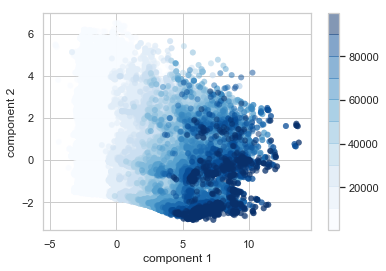

In [112]:
plt.scatter(principalComponents[:, 0], principalComponents[:, 1],
            c=df.price, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Blues', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [113]:
print (round(0.5*len(np.cumsum(pca.explained_variance_ratio_)),0)," features explain ",round(100*np.cumsum(pca.explained_variance_ratio_)[13],3), " % variance")

16.0  features explain  65.082  % variance


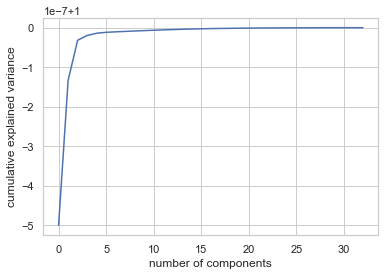

In [114]:
#Explained variance
pca = PCA().fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

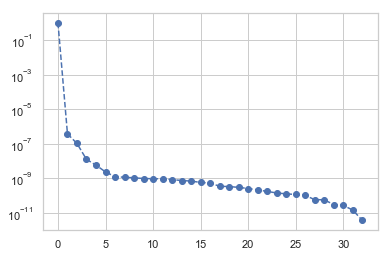

In [115]:
plt.semilogy(pca.explained_variance_ratio_, '--o')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


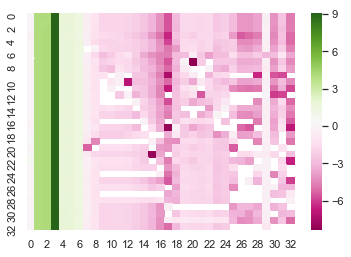

In [116]:

sns.heatmap(np.log(pca.inverse_transform(np.eye(df2_o.shape[1]))), cmap="PiYG")


# 3.6 DIMENSIONALITY REDUCTION -t-SNE

t-distributed Stochastic Neighbor Embedding.

t-SNE  is a tool to visualize high-dimensional data. It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data. t-SNE has a cost function that is not convex, i.e. with different initializations we can get different results.

It is highly recommended to use another dimensionality reduction method (e.g. PCA for dense data or TruncatedSVD for sparse data) to reduce the number of dimensions to a reasonable amount (e.g. 50) if the number of features is very high.

The disadvantages to using t-SNE are roughly:

t-SNE is computationally expensive, and can take several hours on million-sample datasets where PCA will finish in seconds or minutes
The Barnes-Hut t-SNE method is limited to two or three dimensional embeddings.
The algorithm is stochastic and multiple restarts with different seeds can yield different embeddings. However, it is perfectly legitimate to pick the embedding with the least error.
Global structure is not explicitly preserved. This is problem is mitigated by initializing points with PCA (using init=’pca’).

In [117]:
%whos DataFrame

Variable      Type         Data/Info
------------------------------------
data_scaled   DataFrame               carat     tabl<...>593784 rows x 33 columns]
df            DataFrame            carat  table  dep<...>593784 rows x 33 columns]
df2_o         DataFrame            carat  table  dep<...>317674 rows x 33 columns]
df3           DataFrame               carat     tabl<...>593784 rows x 33 columns]


In [118]:
df[features].head()

,carat,table,depth,x,y,z,cut_Ideal,cut_V.Good,color_E,color_F,...,clarity_VVS1,clarity_VVS2,cert_EGL,cert_EGL ISRAEL,cert_EGL Intl.,cert_EGL USA,cert_GIA,cert_HRD,cert_IGI,cert_OTHER
493,0.24,61.0,58.9,4.09,4.10,2.41,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
494,0.31,59.0,60.2,4.40,4.42,2.65,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
495,0.26,56.5,64.1,4.01,4.05,2.58,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
496,0.24,55.0,61.3,4.01,4.03,2.47,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
497,0.30,57.0,62.2,4.21,4.24,2.63,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [119]:
data_scaled[features].head()

,carat,table,depth,x,y,z,cut_Ideal,cut_V.Good,color_E,color_F,...,clarity_VVS1,clarity_VVS2,cert_EGL,cert_EGL ISRAEL,cert_EGL Intl.,cert_EGL USA,cert_GIA,cert_HRD,cert_IGI,cert_OTHER
0,-1.023958,0.692058,-0.292753,-1.242746,-1.414425,-1.310367,-1.272234,1.594576,-0.430552,-0.430313,...,-0.317205,-0.350611,-0.24538,-0.139188,-0.140153,-0.166511,0.539197,-0.129811,-0.280597,-0.093536
1,-0.937869,0.277807,-0.119130,-1.040190,-1.198948,-1.116964,-1.272234,1.594576,-0.430552,-0.430313,...,-0.317205,-0.350611,-0.24538,-0.139188,-0.140153,-0.166511,0.539197,-0.129811,-0.280597,-0.093536
2,-0.999362,-0.240008,0.401741,-1.295019,-1.448093,-1.173373,-1.272234,-0.627126,-0.430552,-0.430313,...,-0.317205,-0.350611,-0.24538,-0.139188,-0.140153,-0.166511,-1.854609,-0.129811,3.563834,-0.093536
3,-1.023958,-0.550697,0.027783,-1.295019,-1.461561,-1.262016,0.786019,-0.627126,-0.430552,-0.430313,...,-0.317205,-0.350611,-0.24538,-0.139188,-0.140153,-0.166511,0.539197,-0.129811,-0.280597,-0.093536
4,-0.950168,-0.136445,0.147984,-1.164338,-1.320154,-1.133081,-1.272234,-0.627126,-0.430552,-0.430313,...,-0.317205,-0.350611,-0.24538,-0.139188,-0.140153,-0.166511,0.539197,-0.129811,-0.280597,-0.093536


In [120]:
df['price'].head()

493    300.0
494    300.0
495    300.0
496    300.0
497    300.0
Name: price, dtype: float64

In [121]:
data_scaled['price'].head()

0   -0.649343
1   -0.649343
2   -0.649343
3   -0.649343
4   -0.649343
Name: price, dtype: float64

In [122]:
data_scaled.values

array([[-1.02395846,  0.6920585 , -0.29275348, ..., -0.12981114,
        -0.28059665, -0.09353646],
       [-0.93786946,  0.27780666, -0.11912982, ..., -0.12981114,
        -0.28059665, -0.09353646],
       [-0.99936161, -0.24000813,  0.40174117, ..., -0.12981114,
         3.56383446, -0.09353646],
       ...,
       [ 2.8992404 , -0.75782292,  0.21476184, ..., -0.12981114,
        -0.28059665, -0.09353646],
       [ 2.38270638,  0.07068075,  0.24147318, ..., -0.12981114,
        -0.28059665, -0.09353646],
       [ 3.76013043, -0.34357109,  0.18805051, ..., -0.12981114,
         3.56383446, -0.09353646]])

Taking a smaller  dataset for TSNE since it takes a long time

In [80]:
df2=pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/ggplot2/diamonds.csv')

In [81]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
Unnamed: 0    53940 non-null int64
carat         53940 non-null float64
cut           53940 non-null object
color         53940 non-null object
clarity       53940 non-null object
depth         53940 non-null float64
table         53940 non-null float64
price         53940 non-null int64
x             53940 non-null float64
y             53940 non-null float64
z             53940 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [82]:
df2 = df2.drop("Unnamed: 0", axis=1)

In [84]:
df2=pd.get_dummies(df2,drop_first=True)

In [85]:
from sklearn import preprocessing
data_scaled = pd.DataFrame(preprocessing.scale(df2),columns = df2.columns) 

Variable                  Type           Data/Info
--------------------------------------------------
Counter                   type           <class 'collections.Counter'>
Facet                     type           <class 'ggplot.facets.Facet'>
TSNE                      type           <class 'sklearn.manifold.t_sne.TSNE'>
X                         ndarray        53940x24: 1294560 elems, type `float64`, 10356480 bytes (9.876708984375 Mb)
X1                        TSNE           TSNE(angle=0.5, early_exa<...>om_state=None, verbose=0)
X_embedded                ndarray        32x2: 64 elems, type `float32`, 256 bytes
absolute_import           _Feature       _Feature((2, 5, 0, 'alpha<...>0, 0, 'alpha', 0), 16384)
aes                       ABCMeta        <class 'ggplot.aes.aes'>
ax                        AxesSubplot    AxesSubplot(0.125,0.125;0.775x0.755)
chart                     ggplot         

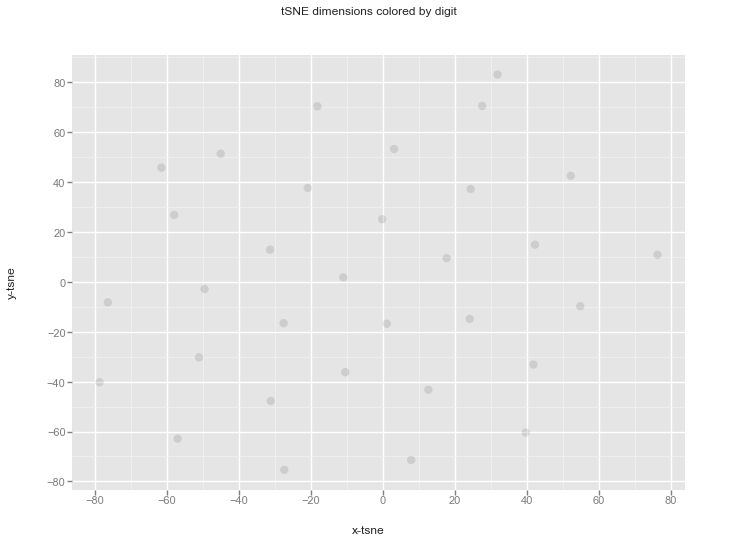

<ggplot: (-9223371905721627367)>
chart_components          module         <module 'ggplot.chart_com<...>ot\\chart_components.py'>
chopsticks                DataFrame           food_pinching_effeci<...>n\n[186 rows x 3 columns]
colors                    module         <module 'ggplot.colors' f<...>ot\\colors\\__init__.py'>
coord_equal               type           <class 'ggplot.coords.coords.coord_equal'>
coord_flip                type           <class 'ggplot.coords.coords.coord_flip'>
coord_polar               type           <class 'ggplot.coords.coords.coord_polar'>
coords                    module         <module 'ggplot.coords' f<...>ot\\coords\\__init__.py'>
data_scaled               DataFrame                carat     depth<...>[53940 rows x 24 columns]
datasets                  module         <module 'ggplot.datasets'<...>\\datasets\\__init__.py'>
date_breaks               function       <function date_breaks at 0x000001E880B80950>
date_format               function       <functi

In [87]:
%whos 

In [89]:
import numpy as np
from sklearn.manifold import TSNE
X = data_scaled.values
X1=TSNE(n_components=2, init='pca',n_iter=250)
X_embedded =X1.fit_transform(X)
X_embedded.shape

(53940, 2)

In [90]:
X_embedded

array([[ 2.0148785 , -3.4851427 ],
       [-1.0479606 , 10.870332  ],
       [-0.48270768,  2.0322611 ],
       ...,
       [-2.8288996 ,  4.1006517 ],
       [ 9.602961  ,  4.9141617 ],
       [ 2.0214262 , -4.957559  ]], dtype=float32)

In [93]:
x1=X_embedded[:,0]
y1=X_embedded[:,1]

In [94]:
x1

array([ 2.0148785 , -1.0479606 , -0.48270768, ..., -2.8288996 ,
        9.602961  ,  2.0214262 ], dtype=float32)

In [95]:
y1

array([-3.4851427, 10.870332 ,  2.0322611, ...,  4.1006517,  4.9141617,
       -4.957559 ], dtype=float32)

In [96]:
df2.columns

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2'],
      dtype='object')

In [97]:
n_sne = 32
rndperm = np.random.permutation(df2.shape[0])

tsne_results = X1.fit_transform(df2.loc[rndperm[:n_sne],df2.columns].values)

In [98]:
tsne_results

array([[ 9.8050928e+03,  5.3325105e+00],
       [ 3.4442473e+03, -8.8022165e-02],
       [-3.4244729e+03, -1.0484741e+02],
       [ 1.2960974e+04, -2.8017130e+00],
       [-3.4503364e+03, -2.3207539e+01],
       [ 3.3690337e+03, -5.5842370e-01],
       [-2.7429829e+03,  7.6684326e+01],
       [ 3.2912759e+03,  1.3800936e+00],
       [-4.2911519e+03,  9.2069412e+01],
       [-1.6951902e+03,  7.3628726e+00],
       [-3.7142468e+03, -1.0218704e+02],
       [-4.6234109e+02,  2.0166984e+00],
       [-2.6255310e+03,  7.1763756e+01],
       [-3.6543398e+03, -7.7306709e+01],
       [ 6.4921455e+03, -1.6149402e+00],
       [-3.7751111e+03,  1.1866085e+02],
       [-1.6038501e+03,  7.2719169e+00],
       [-2.8427288e+03,  6.3880169e+01],
       [-3.3754875e+03, -5.8446655e+01],
       [-3.6092095e+03,  1.3660035e+01],
       [-5.8788806e+02,  1.7309728e+00],
       [ 5.7358540e+03, -6.2725514e-01],
       [-3.7677434e+03, -1.7464073e+01],
       [ 2.9461838e+03, -2.1974938e+00],
       [ 4.98193

In [99]:
df_tsne = df2.loc[rndperm[:n_sne],:].copy()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]

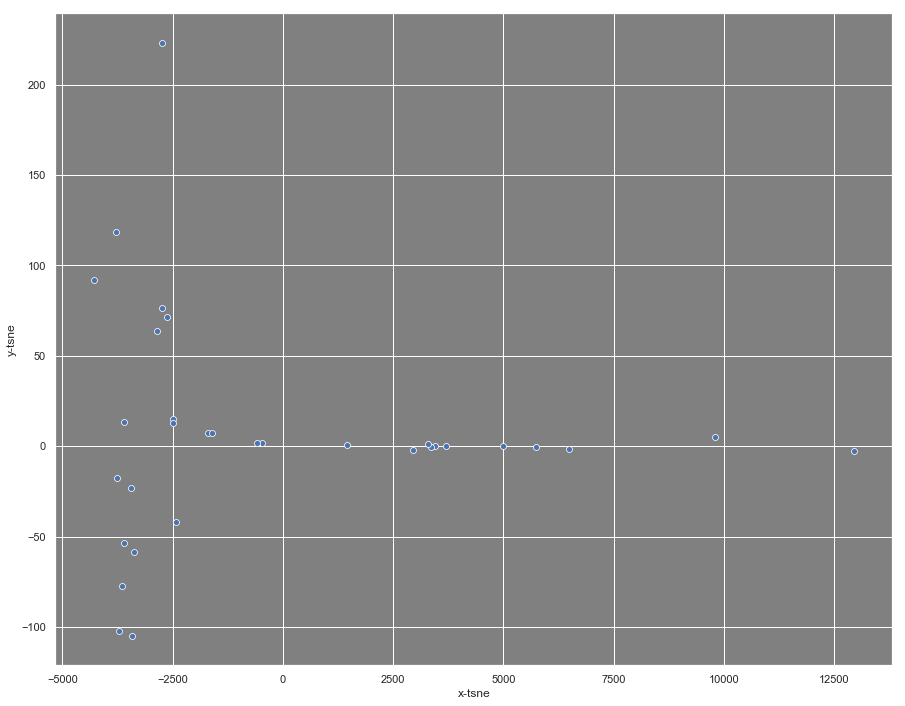

In [102]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
seaborn.set(rc={'axes.facecolor':'gray', 'figure.facecolor':'white'})

fig, ax = plt.subplots()
plt.gcf().set_size_inches(15 ,12)

ax = sns.scatterplot(x='x-tsne', y='y-tsne', data=df_tsne)

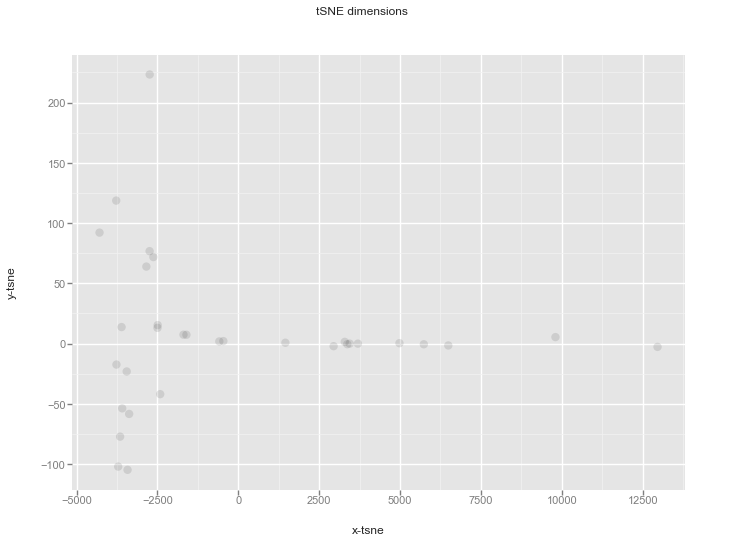

<ggplot: (-9223371905721910973)>

In [103]:
from ggplot import *
chart = ggplot( df_tsne, aes(x='x-tsne', y='y-tsne') ) \
        + geom_point(size=70,alpha=0.1) \
        + ggtitle("tSNE dimensions    ")
chart